## The bese SEIR model simulation of COVID(or other infecious diease) . In this base model, total population is assumed to be constant, i.e. the natural death/birth is ignored.
### 1Terminology: S is the stock of susceptible population, E is the stock of exposed (infected but not yet infectious), I is the stock of infected, R is the stock of removed population (either by death or recovery), and N is the sum of these four.
### 2 Parameters: beta - probability of susceptible infected contact results in a new exposure. 
###                          sigma -  probability of exposed person becomes infected. 1/sigma: average incubation period.
###                          gamma - probability of recovery (assume there is no re-infection, i.e. immunized)/death.                                                                 1/gamma: average infectious time before recovery/removal.
### basic reproduction number: R_0 (beta/gamma)-The expected number of cases directly generated by one case in a population when all individuals are susceptible to infection.

### Simluation experiment 1: R_0 assumed to be constant, equals to 3. For COVID: assume average incubation period 7 days, sigma=1/7, assume 14 days infectious period, gamma=1/14. Given R_0=3, beta=3*gamma= 3/14. Total number of infected people is 94%. Due to the depletion of susceptible person, not all person are infected even though R_0=3.


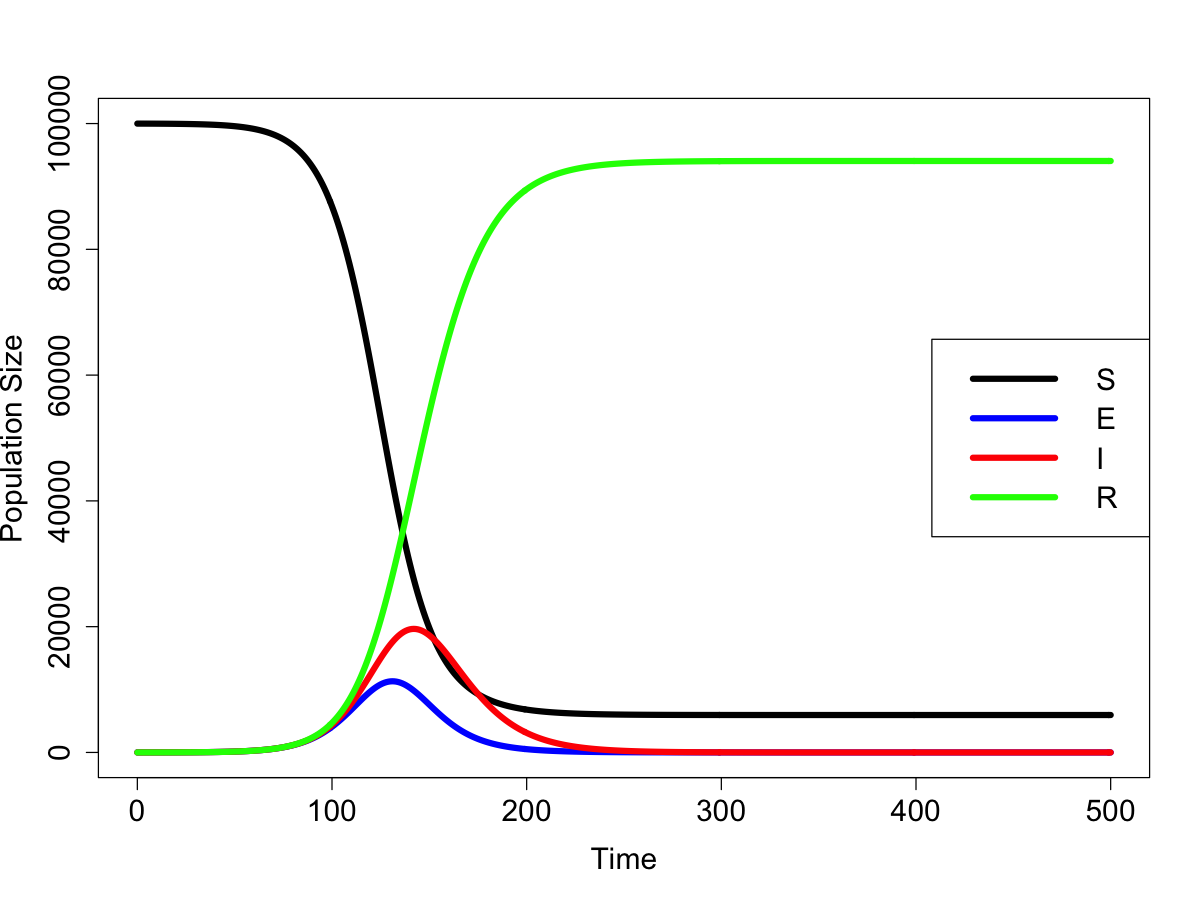

In [255]:
#total population is 100,000.
require(deSolve)
seir <- function(t, x, params){
    S <- x[1]
    E <- x[2]
    I <- x[3]
    R <- x[4]
    with(as.list(params),
    {
        dS <- -beta*I*S/N
        dE <- beta*I*S/N - sigma*E
        dI <- sigma*E -gamma*I
        dR <- gamma*I
        res <- c(dS, dE, dI, dR)
        list(res)
    })
}
N <- 100000
params <- c(N=N, beta=3/14, sigma=1/7, gamma= 1/14)
t <- seq(0, 500)
x0 <- c(N-10, 10, 0, 0)
smat <- ode(y=x0, t, seir, params)
colnames(smat) <- c('time', 'S', 'E', 'I', 'R')
options(repr.plot.width=10, repr.plot.height=7.5, scipen=999)
plot(smat[,'time'], smat[,'S'], type='l', lwd=5, 
     xlab='Time', ylab='Population Size', cex.lab=1.5, cex.axis=1.5, ylim=c(0, N))
lines(smat[,'time'], smat[,'E'], col="blue", lwd=5)
lines(smat[,'time'], smat[,'I'], col="red", lwd=5)
lines(smat[,'time'], smat[,'R'], col="green", lwd=5)
legend("right", c('S','E', 'I','R'), col=c('black', 'blue', 'red', 'green'), lwd=5, cex=1.5)

In [250]:
#Total number of people get infected
library(scales)
scales::percent(1-tail(smat, n=1)[,'S']/N)

[1] "94%"

### Simulation experiment 2: assume government take action in contact tracing and quarantine, reducing infectious period from 14 days to 7 days (ie: gamma=1/7). This results in significantly reduce in total number of people infected: from 94% to 58%

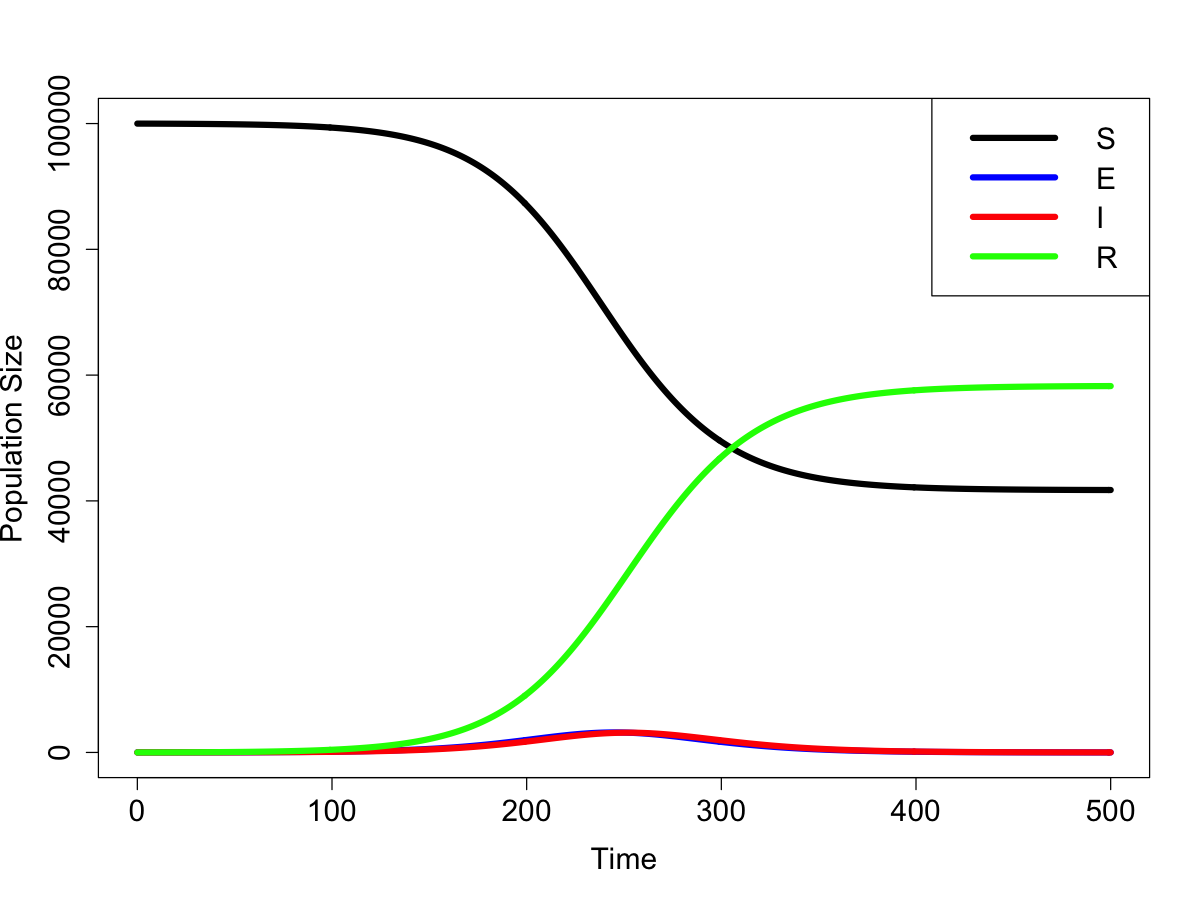

In [260]:
require(deSolve)
seir <- function(t, x, params){
    S <- x[1]
    E <- x[2]
    I <- x[3]
    R <- x[4]
    with(as.list(params),
    {
        dS <- -beta*I*S/N
        dE <- beta*I*S/N - sigma*E
        dI <- sigma*E -gamma*I
        dR <- gamma*I
        res <- c(dS, dE, dI, dR)
        list(res)
    })
}
N <- 100000
params <- c(N=N, beta=3/14, sigma=1/7, gamma= 1/7)
t <- seq(0, 500)
x0 <- c(N-10, 10, 0, 0)
smat <- ode(y=x0, t, seir, params)
colnames(smat) <- c('time', 'S', 'E', 'I', 'R')
options(repr.plot.width=10, repr.plot.height=7.5, scipen=999)
plot(smat[,'time'], smat[,'S'], type='l', lwd=5, 
     xlab='Time', ylab='Population Size', cex.lab=1.5, cex.axis=1.5, ylim=c(0, N))
lines(smat[,'time'], smat[,'E'], col="blue", lwd=5)
lines(smat[,'time'], smat[,'I'], col="red", lwd=5)
lines(smat[,'time'], smat[,'R'], col="green", lwd=5)
legend("topright", c('S','E', 'I','R'), col=c('black', 'blue', 'red', 'green'), lwd=5, cex=1.5)

In [259]:
#Total number of people get infected
library(scales)
scales::percent(1-tail(smat, n=1)[,'S']/N)

[1] "58%"

### Simulation experiment 3: asume social distancing is imposed on 130th day, resulting in R_0=1.5
### This measure reduces the total infected people from 94% to 80%.

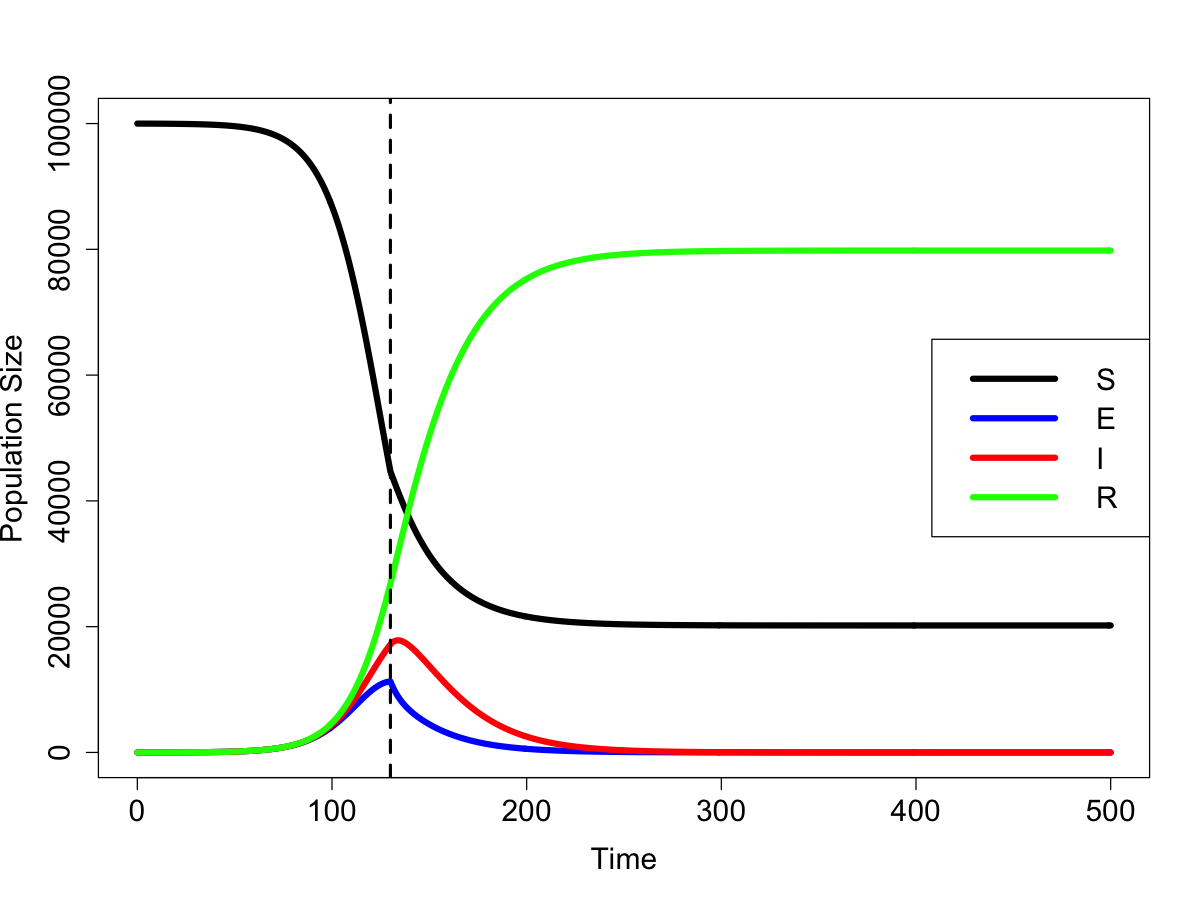

In [263]:
require(deSolve)
seir <- function(t, x, params){

    S <- x[1]
    E <- x[2]
    I <- x[3]
    R <- x[4]
    with(as.list(params),
    {
        if (t < n_inter) {
      beta = 3*gamma
    } else if (t >= n_inter) {
      beta = 1.5*gamma
    } 
        dS <- -beta*I*S/N
        dE <- beta*I*S/N - sigma*E
        dI <- sigma*E -gamma*I
        dR <- gamma*I
        res <- c(dS, dE, dI, dR)
        list(res)
    })
}

N <- 100000
params <- c(N=N, sigma=1/7, gamma= 1/14, n_inter=130)
t <- seq(0, 500)
x0 <- c(N-10, 10, 0, 0)
smat <- ode(y=x0, t, seir, params)
colnames(smat) <- c('time', 'S', 'E', 'I', 'R')
options(repr.plot.width=10, repr.plot.height=7.5, scipen=999)
plot(smat[,'time'], smat[,'S'], type='l', lwd=5, 
     xlab='Time', ylab='Population Size', cex.lab=1.5, cex.axis=1.5, ylim=c(0, N))

lines(smat[,'time'], smat[,'E'], col="blue", lwd=5)
lines(smat[,'time'], smat[,'I'], col="red", lwd=5)
lines(smat[,'time'], smat[,'R'], col="green", lwd=5)
abline(v=params['n_inter'], lty=2, lwd=2.5)
legend("right", c('S','E', 'I','R'), col=c('black', 'blue', 'red', 'green'), lwd=5, cex=1.5)

In [264]:
#Total number of people get infected
scales::percent(1-tail(smat, n=1)[,'S']/N)

[1] "80%"

### Simulation experiment 4: asume same social distancing is imposed on a later date, like 160th day.
### This measure barely changes the total infected people (from 94% to 90%). Comparing experiment 3&4, timing of social distancing is very important. Action too late makes much less difference. 

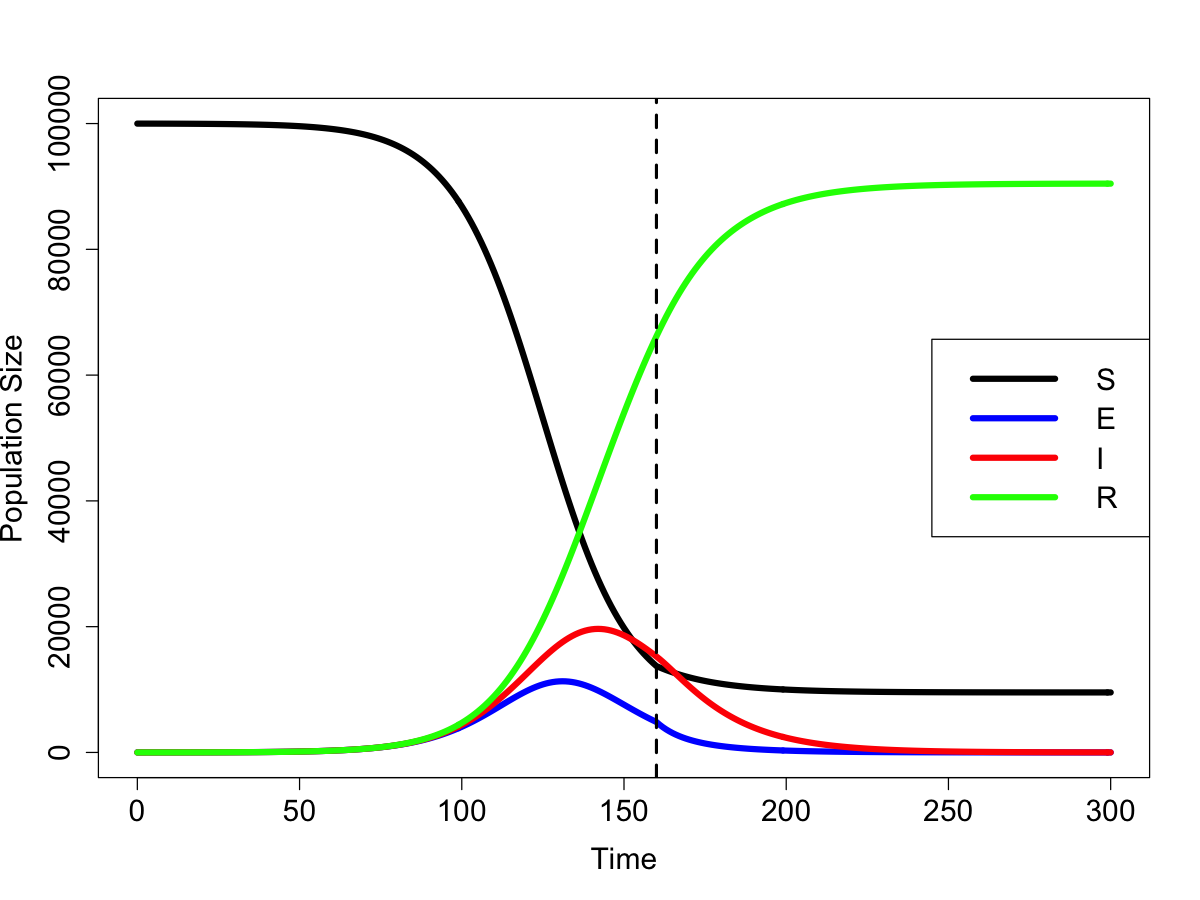

In [270]:
require(deSolve)
seir <- function(t, x, params){

    S <- x[1]
    E <- x[2]
    I <- x[3]
    R <- x[4]
    with(as.list(params),
    {
        if (t < n_inter) {
      beta = 3*gamma
    } else if (t >= n_inter) {
      beta = 1.5*gamma
    } 
        dS <- -beta*I*S/N
        dE <- beta*I*S/N - sigma*E
        dI <- sigma*E -gamma*I
        dR <- gamma*I
        res <- c(dS, dE, dI, dR)
        list(res)
    })
}

N <- 100000
params <- c(N=N, sigma=1/7, gamma= 1/14, n_inter=160)
t <- seq(0, 300)
x0 <- c(N-10, 10, 0, 0)
smat <- ode(y=x0, t, seir, params)
colnames(smat) <- c('time', 'S', 'E', 'I', 'R')
options(repr.plot.width=10, repr.plot.height=7.5, scipen=999)
plot(smat[,'time'], smat[,'S'], type='l', lwd=5, 
     xlab='Time', ylab='Population Size', cex.lab=1.5, cex.axis=1.5, ylim=c(0, N))

lines(smat[,'time'], smat[,'E'], col="blue", lwd=5)
lines(smat[,'time'], smat[,'I'], col="red", lwd=5)
lines(smat[,'time'], smat[,'R'], col="green", lwd=5)
abline(v=params['n_inter'], lty=2, lwd=2.5)
legend("right", c('S','E', 'I','R'), col=c('black', 'blue', 'red', 'green'), lwd=5, cex=1.5)

In [271]:
##Total number of people get infected
scales::percent(1-tail(smat, n=1)[,'S']/N)

[1] "90%"